In [6]:
import pandas as pd

# Regression for Preply position

In [6]:
preply = pd.read_csv('../../data/model_ranking/preply.csv', index_col=0)

In [7]:
preply.head()

,num_languages,speaks_english,gender_tuned,income_level,num_teaches,num_ratings,avg_rating,price,is_featured,first_letter,position
4124,2,1,1,-0.625665,1,4.0,4.9,0.733894,1,0.72,1
6485,2,1,0,0.504677,1,0.0,0.0,-0.553682,1,0.36,1
41,2,1,0,-0.825237,1,1.0,5.0,-0.296167,1,0.60,1
2470,3,1,1,-0.173776,1,21.0,4.9,1.248924,1,0.12,1
344,3,1,1,3.278941,1,4.0,5.0,3.952833,1,0.52,1


In [9]:
preply.shape

(6296, 11)

In [10]:
X = preply[['num_languages', 'speaks_english', 'gender_tuned', 'income_level', 'num_teaches', 'num_ratings', 'avg_rating', 'price', 'first_letter']].values
y = preply['position'].values

In [12]:
import matplotlib.pyplot as plt

preply.corr().style.background_gradient(cmap='coolwarm')

,num_languages,speaks_english,gender_tuned,income_level,num_teaches,num_ratings,avg_rating,price,is_featured,first_letter,position
num_languages,1.000000,0.252479,-0.042109,-0.004835,0.404614,0.111718,0.096309,0.123420,0.032918,-0.050673,-0.036586
speaks_english,0.252479,1.000000,-0.028415,-0.009361,0.030986,0.057003,0.099818,0.054034,0.022190,-0.074755,-0.066734
gender_tuned,-0.042109,-0.028415,1.000000,-0.053436,-0.033240,-0.072128,0.000194,0.064799,0.022665,0.007379,0.006949
income_level,-0.004835,-0.009361,-0.053436,1.000000,-0.097081,-0.111127,-0.039037,0.391160,-0.009338,0.022569,0.059314
num_teaches,0.404614,0.030986,-0.033240,-0.097081,1.000000,0.313882,0.146578,0.058034,0.004962,-0.026232,0.010280
num_ratings,0.111718,0.057003,-0.072128,-0.111127,0.313882,1.000000,0.341493,0.104134,0.090874,-0.024742,-0.056031
avg_rating,0.096309,0.099818,0.000194,-0.039037,0.146578,0.341493,1.000000,0.097595,0.054039,-0.022905,-0.122953
price,0.123420,0.054034,0.064799,0.391160,0.058034,0.104134,0.097595,1.000000,0.059106,-0.022153,-0.046609
is_featured,0.032918,0.022190,0.022665,-0.009338,0.004962,0.090874,0.054039,0.059106,1.000000,-0.000230,-0.125017
first_letter,-0.050673,-0.074755,0.007379,0.022569,-0.026232,-0.024742,-0.022905,-0.022153,-0.000230,1.000000,-0.036683


In [67]:
X

array([[ 2.  ,  1.  ,  1.  , ...,  4.9 , 21.  ,  0.72],
       [ 2.  ,  1.  ,  0.  , ...,  0.  , 11.  ,  0.36],
       [ 2.  ,  1.  ,  0.  , ...,  5.  , 13.  ,  0.6 ],
       ...,
       [ 2.  ,  1.  ,  1.  , ...,  0.  , 17.  ,  0.84],
       [ 2.  ,  1.  ,  0.  , ...,  5.  ,  8.  ,  0.48],
       [ 2.  ,  1.  ,  1.  , ...,  0.  , 13.  ,  0.12]])

In [68]:
y

array([  1,   1,   1, ..., 927, 928, 929])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

In [71]:
import seaborn as sns
def plot_regression(y_test, y_pred):
    plot_df = pd.DataFrame()
    plot_df['y_true'] = y_test
    plot_df['y_pred'] = y_pred
    sns.lmplot(x='y_true',y='y_pred', data=plot_df, fit_reg=True)

In [72]:
y_hat = lin_reg.predict(X_test)

In [73]:
y_hat[:3]

array([302.73846744, 293.18749514, 310.29977469])

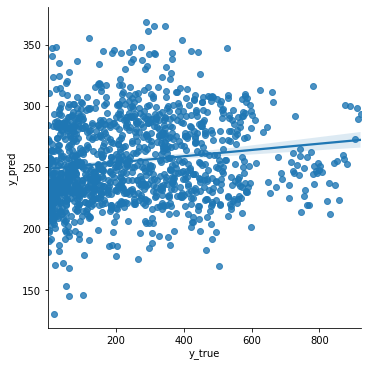

In [74]:
plot_regression(y_test, y_hat)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.019796622014625176

In [76]:
# XGBoost Regressor

In [77]:
import xgboost

In [78]:
xgb = xgboost.XGBRegressor(learning_rate=0.1,
                 max_depth=4,
                 n_estimators=150)

In [79]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_hat = xgb.predict(X_test)

In [81]:
y_hat[:3]

array([178.31372, 232.11061, 276.59085], dtype=float32)

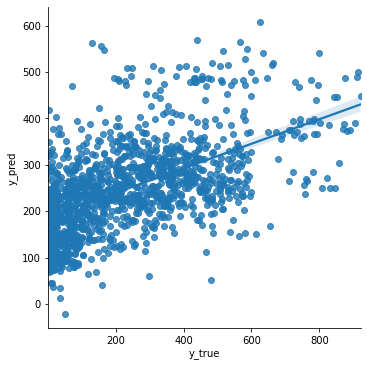

In [82]:
plot_regression(y_test, y_hat)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

-0.07252332811086748